In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

## 4 Different Kinds of Interior Polygons

Triangles (2 kinds), Parallelograms and semi-hexagons.

- Traingle V - V1, V2 and V3
- Traingle CV - V1, V2 and C
- Parallelograms = V1 V2, V3 and C
Technically, there is one more, but let it go for now.

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

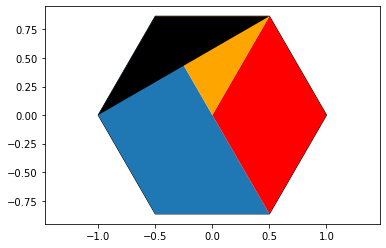

In [15]:
size=1
dist = size/2
h = Hex(0,0, size)
h.get_verts()
h.render(fill=None)


h.render_polygon([1,2,3,], include_center=False, fc='k', zorder=3)
h.render_polygon([2,3,4,5], include_center=False)
h.render_polygon([5,0,1], include_center=True, fc='red')
h.render_polygon([1,2], include_center=True, fc='orange')

plt.axis('equal')

## Idea Behind these sets of Images

1. A colored background. Dark to start with.

1b. No Hexagon borders

2. For each hex in HexGrid, choose one (or two) random Interior Polygons.
3. Render them. with some High Saturation color

In [18]:
[(x, (x+1)%6, (x+2)%6, (x+3)%6) for x in range(6) ]

[(0, 1, 2, 3),
 (1, 2, 3, 4),
 (2, 3, 4, 5),
 (3, 4, 5, 0),
 (4, 5, 0, 1),
 (5, 0, 1, 2)]

In [22]:
#Can use Triples to create RHOMBUSES or V_Traingles (don't include center)
DOUBLES = [(0,1), (1,2), (2,3), (3,4), (4,5), (5,0) ]
TRIPLES= [(0,1,2), (1,2,3), (2,3,4), (3,4,5), (4,5,0),  (5, 0, 1 )]
QUADS = [(0, 1, 2, 3),
 (1, 2, 3, 4),
 (2, 3, 4, 5),
 (3, 4, 5, 0),
 (4, 5, 0, 1),
 (5, 0, 1, 2)]

POLY_CHOICES = [DOUBLES, TRIPLES, QUADS]

In [229]:
def pick_random_interior_polygon(p):
    type_picked = np.random.choice(3, p=p)
    _len = len(POLY_CHOICES[type_picked])
    idx_picked = np.random.choice(_len)
    poly_picked = POLY_CHOICES[type_picked][idx_picked]
    center_toggle = np.random.choice([True, False])
    if len(poly_picked) < 3: # If only two adjacent vertices, then center must be included to form a polygon
        center_toggle = True
    return (poly_picked, center_toggle)

In [241]:
#np.random.choice(3, p=[0,0,1])
pick_random_interior_polygon([0.5, 0.5,0])

((5, 0), True)

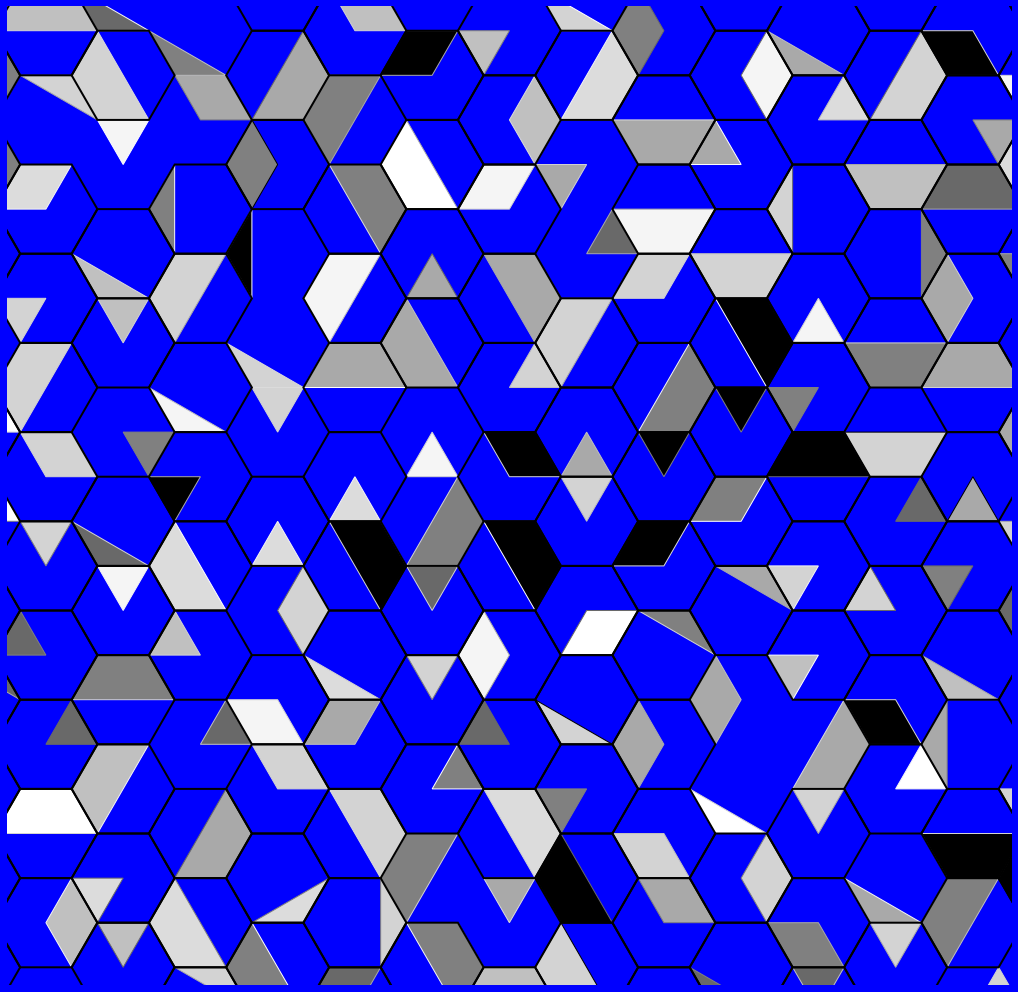

In [304]:
fig, ax = plt.subplots(figsize=(18,18))
fc_bg = 'blue'
fig.patch.set_facecolor(fc_bg)

size=2
hg = HexGrid(26,15,size, flat=True)

COL = BLUES_HIGH_SAT + RED_BROWNS_HIGH_SAT #+ PINKS_LOW_SAT

#COL = RED_BROWNS_HIGH_SAT
#COL = PINKS_LOW_SAT
COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
COL = BLACK_WHITES_LOW_SAT

DONT_PICK_HHEX = [0.5, 0.5, 0]
LOW_HHEX = [0.45, 0.45, 0.1]
EQUAL = [0.33, 0.34, 0.33]
PICK_ONE = [1,0,0]

for idx, h in enumerate(hg.hlist):    
            
    if np.random.random() > 0.001:
        #Draw A random polygon
        pt_list, ctr_flag = pick_random_interior_polygon(p=EQUAL)
        h.render_polygon(pt_list, include_center=ctr_flag, 
                         fc=COL[np.random.randint(len(COL))],
                        color=COL[np.random.randint(len(COL))])            
    if np.random.random() < 0.8:
        _col = COL[np.random.randint(len(COL))]
        h.render(fill=None, lw=2, color='k', zorder=3)
            
    
plt.axis('equal')
#ax.set_aspect('equal')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-20, 20)
ax.set_ybound(lower=-18, upper=20)
ax.set_xbound(lower=-18, upper=20)
plt.axis('off')

save_file(fig, 'bgBlk_RANDOM_BW_LOWSAT')